<a href="https://colab.research.google.com/github/asfi-commit/Daktar/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection and Analysis


PIMA Diabetis Dataset 

In [ ]:
# loading the diabetes dataset to a pandas dataframe 
db_dataset= pd.read_csv('/content/diabetes.csv')

In [ ]:
pd.read_csv?

In [ ]:
# printing the first 5 rows to dataframe 
db_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# nummber of rows and columns in dataset
db_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of dataset
db_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
db_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non diabetic


1 --> Diabetic

In [ ]:
db_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# spreading the data and labels
A= db_dataset.drop(columns='Outcome', axis=1)
B= db_dataset['Outcome']

In [ ]:
print(A)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
print(B)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standarddization 

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(A)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(A)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
A = standardized_data
B = db_dataset['Outcome']

In [ ]:
print(A)
print(B)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
A_train, A_test, B_train, B_test = train_test_split(A,B, test_size=0.2, stratify=B, random_state=2)

In [ ]:
print(A.shape, A_train.shape, A_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
# training the support vector machine classifier 
classifier.fit(A_train, B_train)

SVC(kernel='linear')

Model Evaluation 

Acurracy Score

In [ ]:
# accuracy score on the training data
A_train_prediction = classifier.predict(A_train)
training_data_accuracy = accuracy_score(A_train_prediction,B_train)

In [ ]:
print('Accuracy Score of Training Data: ', training_data_accuracy)

Accuracy Score of Training Data:  0.7866449511400652


Text(0.5, 1.0, 'Confussion Matrix')

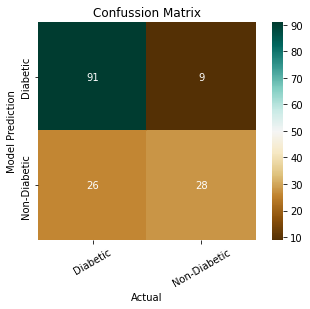

In [ ]:
# accuracy score on test data
A_test_prediction = classifier.predict(A_test)
test_data_accuracy = accuracy_score(A_test_prediction, B_test)
mat = confusion_matrix(B_test, A_test_prediction)
axes = sns.heatmap(mat, square=True, annot = True, fmt='d', cbar= True, cmap=plt.cm.BrBG)
class_labels = ['Diabetic','Non-Diabetic']
axes.set_xlabel('Actual')
axes.set_ylabel('Model Prediction')

tick_marks = np.arange(len(class_labels))+0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(class_labels,rotation=30)

axes.set_yticks(tick_marks)
axes.set_yticklabels(class_labels, rotation=90)

axes.set_title('Confussion Matrix')

In [ ]:
print('Accuracy Score of Test Data: ', test_data_accuracy)

Accuracy Score of Test Data:  0.7727272727272727


Making a Predictive System 

In [ ]:
user_input = (5,166,72,19,175,25.8,0.587,51)

# changing the user_input to numpy array
numpy_arr = np.asarray(user_input)

# reshape the array as we are predicting for one instance 
user_input_reshapped = numpy_arr.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(user_input_reshapped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
